In [1]:
pip install pandas

You should consider upgrading via the 'C:\Users\garca\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [17]:
import pandas as pd

In [18]:
data = pd.read_csv('inadvance_synth.csv',sep=';')
print(data['age'].mean())

79.4033215326947


In [19]:
listnames = ['variable', 'missing']
df = data.isnull().sum()
new = pd.DataFrame(df)
new.columns =[ 'missing']

sorted_df = new.sort_values(by='missing')
#df.sort_values(, ascending = 'TRUE')

In [20]:
label = data['label']
counts = label.nunique()
counts
label = pd.DataFrame(label)
label.columns =[ 'label']

In [21]:
#label['label'].value_counts()

In [22]:
data['codservicioreal'] = data['codservicioreal'].astype('category')
data['codidiagingreso'] = data['codidiagingreso'].astype('category')
label['label']= label['label'].astype('category')
data['codservi2'] = data['codservicioreal'].cat.codes
data['codiagngr2'] = data['codidiagingreso'].cat.codes

In [23]:
y = label
X = data.drop(['Unnamed: 0','codidiagingreso','codservicioreal', 'label'], axis = 1) 

In [24]:
from pandas.api.types import is_numeric_dtype
def handleMissVar(df):
    for column in df:
        if(is_numeric_dtype(df[column])):
            mean = df[column].mean()
            df[column].fillna(mean,inplace=True)
    return df


In [25]:
X = handleMissVar(X)

In [26]:

from sklearn.model_selection import train_test_split
''' np.random.seed(100)
trainx, testx, trainy, testy = train_test_split(df, y, test_size=0.3, random_state = 100)
##test, train = np.split(df, [int(.3*len(df))])
training_set, validation_set = train_test_split(df,y test_size = 0.2, random_state = 21)
testy
'''

X_train, X_val,y_train,y_val = train_test_split(X,y, test_size = 0.2, random_state = 21)

In [27]:
X_train = handleMissVar(X_train)
X_val = handleMissVar(X_val)
y_train = handleMissVar(y_train)
y_val = handleMissVar(y_val)

**RANDOMFOREST**

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
from sklearn.metrics import accuracy_score,classification_report, precision_score, recall_score, roc_auc_score, f1_score,precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random

**RandomForest**

GridSearch Where we obtained the best combination --> {'max_depth': 150, 'n_estimators': 350}
Accuracy:0.8220714859398646

****Model results using best Combination of Hyper-Params****



In [31]:
RF = RandomForestClassifier(n_estimators= 350, max_depth = 150,class_weight = 'balanced')
RF.fit(X_train, y_train)
y_pred = RF.predict(X_val)

C:\Users\garca\AppData\Local\Temp/ipykernel_15580/1279577601.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train, y_train)


In [33]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, RF.predict_proba(X_val)[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
print(f'AUC_ROC : ', roc_auc)

AUC_ROC :  0.906603092399404


In [34]:
print(f"Accuray : {accuracy_score(y_val, y_pred) * 100:.2f}%")
print(f"Precision: {precision_score(y_val,y_pred, average='weighted')}")
print(f"Recall: {recall_score(y_val,y_pred, average='weighted')}")

Accuray : 83.29%
Precision: 0.8309876038299272
Recall: 0.8328995314940135


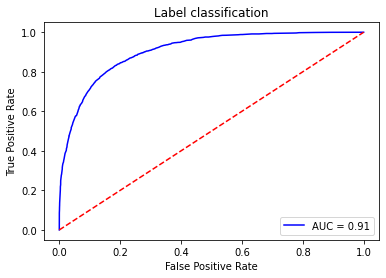

In [35]:
plt.title('Label classification')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Now train model with all the data

In [36]:
RF = RandomForestClassifier(n_estimators= 350, max_depth = 150,class_weight = 'balanced')
RF.fit(X, y)

C:\Users\garca\AppData\Local\Temp/ipykernel_15580/3193069571.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X, y)


RandomForestClassifier(class_weight='balanced', max_depth=150, n_estimators=350)

In [37]:
import pickle
# save
with open('RandomForest.pkl','wb') as f:
    pickle.dump(RF,f)
# load
with open('RandomForest.pkl', 'rb') as f:
    clf2 = pickle.load(f)

RandomForestClassifier(class_weight='balanced', max_depth=150, n_estimators=350)

**Gradient Boosting**

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

Best combination of HP for GB = {'criterion': 'squared_error', 'learning_rate': 0.3, 'loss': 'deviance', 'n_estimators': 300}
Accuracy:0.9503072839361183

In [43]:
import numpy as np
y2 = np.ravel(y)
y2_train = np.ravel(y_train)

In [44]:
GB = GradientBoostingClassifier(criterion = 'squared_error', loss = 'deviance', learning_rate = 0.3, n_estimators= 300, max_depth = 100)
GB.fit(X_train, y2_train)
y_pred = GB.predict(X_val)

In [45]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, GB.predict_proba(X_val)[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
print(f'AUC_ROC : ', roc_auc)

AUC_ROC :  0.9153959016393443


Accuray : 78.72%
Precision: 0.7868075721961177
Recall: 0.7872201978136387


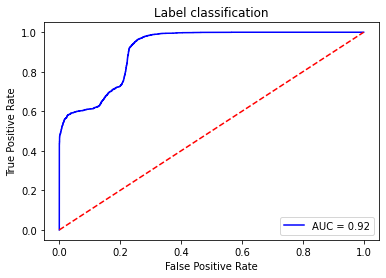

In [46]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, GB.predict_proba(X_val)[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
print(f'AUC_ROC : ', roc_auc)
print(f"Accuray : {accuracy_score(y_val, y_pred) * 100:.2f}%")
print(f"Precision: {precision_score(y_val,y_pred, average='weighted')}")
print(f"Recall: {recall_score(y_val,y_pred, average='weighted')}")

plt.title('Label classification')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [47]:
GB = GradientBoostingClassifier(criterion = 'squared_error', loss = 'deviance', learning_rate = 0.3, n_estimators= 300, max_depth = 100)
GB.fit(X, y2)

GradientBoostingClassifier(criterion='squared_error', learning_rate=0.3,
                           max_depth=100, n_estimators=300)

In [48]:
import pickle
# save
with open('GradientBoostingClas.pkl','wb') as f:
    pickle.dump(GB,f)
# load
with open('GradientBoostingClas.pkl', 'rb') as f:
    clf2 = pickle.load(f)

SVM- aun no está hecho

In [31]:
from sklearn import svm

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_params = {
    'C': [1,10, 100],
    "kernel":['linear','poly','rbf','sigmoid']
            }

clf = SVC(gamma='scale', class_weight = 'balanced')
grid = GridSearchCV(clf, rf_params, cv=3, scoring='accuracy')
grid.fit(X, y)
print(grid.best_params_)
print("Accuracy:"+ str(grid.best_score_))

Best combination of HyperParams

In [32]:
modl = svm.SVC(kernel = 'linear', C = 1000)
modl.fit(X_train, y_train)
y_pred = modl.predict(X_val)

C:\Users\garca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, modl.predict_proba(X_val)[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

print(f'AUC_ROC : ', roc_auc)
print(f"Accuray : {accuracy_score(y_val, y_pred) * 100:.2f}%")
print(f"Precision: {precision_score(y_val,y_pred, average='weighted')}")
print(f"Recall: {recall_score(y_val,y_pred, average='weighted')}")

plt.title('Label classification')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

Best combination
{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy:0.7612973988077346

In [50]:
lnr = LogisticRegression(C = 1, penalty = 'l2', solver = 'liblinear',class_weight='balanced')
lnr.fit(X_train, y2_train)
y_pred = lnr.predict(X_val)

AUC_ROC :  0.8409577496274216
Accuray : 76.83%
Precision: 0.7770854074592994
Recall: 0.7683498178032275


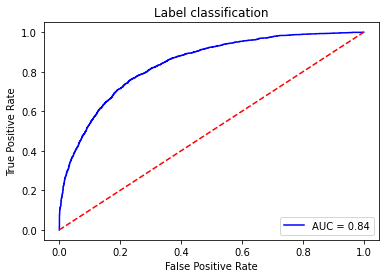

In [51]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, lnr.predict_proba(X_val)[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
print(f'AUC_ROC : ', roc_auc)
print(f"Accuray : {accuracy_score(y_val, y_pred) * 100:.2f}%")
print(f"Precision: {precision_score(y_val,y_pred, average='weighted')}")
print(f"Recall: {recall_score(y_val,y_pred, average='weighted')}")

plt.title('Label classification')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [52]:
lnr = LogisticRegression(C = 1, penalty = 'l2', solver = 'liblinear',class_weight='balanced')
lnr.fit(X, y2)

LogisticRegression(C=1, class_weight='balanced', solver='liblinear')

In [53]:
import pickle
# save
with open('LogisticRegression.pkl','wb') as f:
    pickle.dump(lnr,f)
# load
with open('LogisticRegression.pkl', 'rb') as f:
    clf2 = pickle.load(f)

# clf.predict(...)